# Time Series

In this chapter you'll explore the two datasets you'll use in this course.


The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models. (datacamp)

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


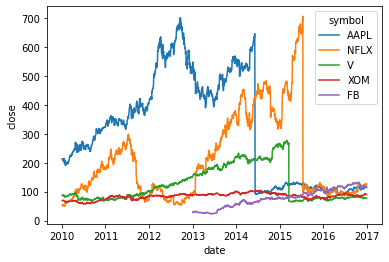

In [2]:
# Read in the data
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())
#select a few stocks
stocks=['AAPL','FB','NFLX','XOM','V']
best_stocks=data[data.symbol.isin(stocks)]

# Loop through each column, plot its values over time
sns.lineplot(data=best_stocks,x='date',y='close',hue='symbol')
plt.show()

In [3]:
# parent folder of sound files
INPUT_DIR=r"C:/Users/56945/Desktop/Data Science Portfolio/Heavy Datasets/heartbeats"
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12   

In [4]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
set_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [5]:
set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_a_timing.head()

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992


In [6]:
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
set_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [7]:
#merge both set-a and set-b
frames = [set_a, set_b]
train_ab=pd.concat(frames)
train_ab.describe()

,dataset,fname,label,sublabel
count,832,832,585,149
unique,2,832,5,2
top,b,set_a/artifact__201012172012.wav,normal,noisynormal
freq,656,1,351,120


In [8]:
nb_classes=train_ab.label.unique()

print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))
print (nb_classes)

Number of training examples= 832   Number of classes= 6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


In [9]:
###plot the different classes and their subclasses 
## plot wiz 

## In the next step we're going to visualize two ways to plot the duration of the audio vs their frequencies for all the different types of audio files.

## Normal audio files
In the Normal category there are normal, healthy heart sounds. These may contain noise in the final second of the recording as the device is removed from the body. They may contain a variety of background noises (from traffic to radios). They may also contain occasional random noise corresponding to breathing, or brushing the microphone against clothing or skin. A normal heart sound has a clear “lub dub, lub dub” pattern, with the time from “lub” to “dub” shorter than the time from “dub” to the next “lub” (when the heart rate is less than 140 beats per minute)(source: Rita Getz)


duration: 4.963809523809524
(109452,) 22050


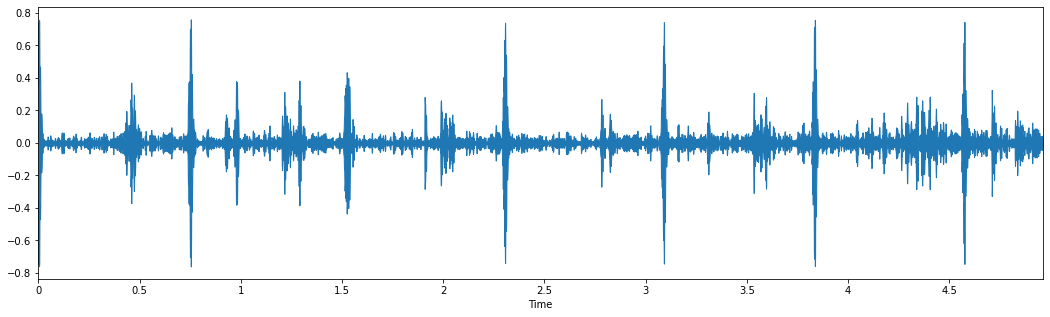

-------------------------------both perfoms the same plot-------------


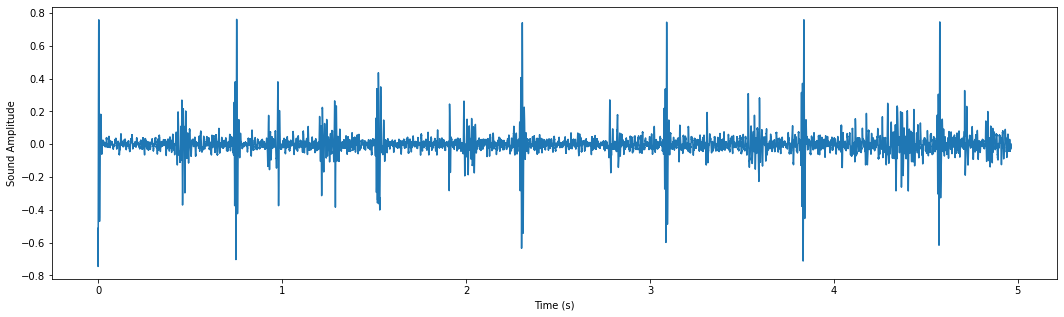

In [10]:
import librosa as lr
import librosa.display 
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"

# Load using Librosa
audio, sfreq = lr.load(normal_file)   #default sampling rate is 22 HZ
dur=lr.get_duration(audio)            #final  duration
time=np.arange(0, len(audio)) / sfreq      #time array

print ("duration:", dur)
print(audio.shape, sfreq)

# librosa plot
plt.figure(figsize=(18,5))
lr.display.waveplot(audio, sr=sfreq)
plt.show()

print('-------------------------------both perfoms the same plot-------------')
# Plot audio over time
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(time,audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()


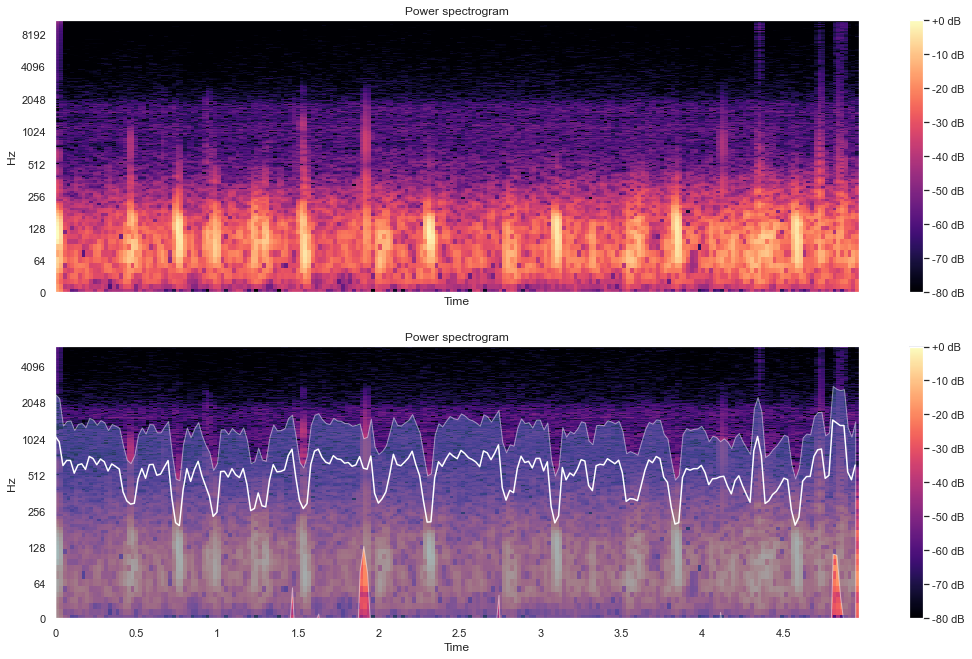

In [33]:
from librosa.core import amplitude_to_db
from librosa.display import specshow
from librosa.core import stft

fig, axs = plt.subplots(2, 1, figsize=(18,11), sharex=True)

audio_spec=np.abs(lr.stft(audio))
S_left=lr.stft(audio,center=False)
dtype_short=lr.stft(audio,hop_length=64)

# Calculate the spectral centroid, bandwidth and the times for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=audio_spec)[0]
centroids = lr.feature.spectral_centroid(S=audio_spec)[0]
times = lr.times_like(audio_spec)


########### UPPER PLOT #############
img = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[1])
axs[1].set_title('Power spectrogram')
fig.colorbar(img, ax=axs[1], format="%+2.0f dB")


axs[1].plot(times, centroids, color='w')
axs[1].fill_between(times, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
axs[1].set(ylim=[None, 6000])

################## without the reference as np.max  ######################
img2 = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[0])
axs[0].set_title('Power spectrogram')
fig.colorbar(img2, ax=axs[0], format="%+2.0f dB")


### As we can see, we have two ways to visualize our spectograms, the first one is with 
# Explicar el espectograma y agregar bandwidths
# ca,biar input dir

### now, we proceed to visualize our data in a smooth way by taking the rolling mean of 50 samples. By doing this we remove the short-term noise and retain the general pattern

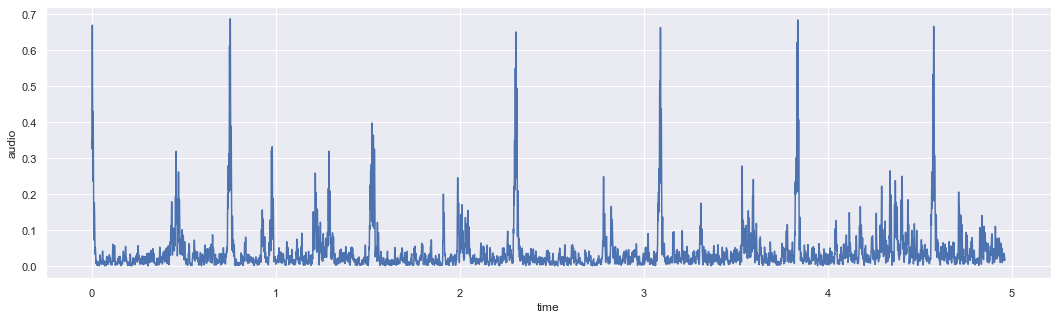

In [12]:
nfile=pd.DataFrame(data={'time':time,'audio':audio})
audio_rectified = nfile.apply(np.abs)

sns.set(rc={'figure.figsize':(18,5)})
audio_rectified_smooth = audio_rectified.rolling(50).mean()
sns.lineplot(data=audio_rectified_smooth,x='time',y='audio')
plt.show()



In [13]:
normal_df=train_ab[train_ab['label']=='normal']
normal_df.replace({'fname': {'Btraining_': ''}}, regex=True,inplace=True)
normal_array=normal_df['fname'].to_numpy()

#for audio in normal_array:
    #audio_dir=INPUT_DIR+'/'+audio
    #audio, sfreq = lr.load(audio_dir,duration=5)   #default sampling rate is 22 HZ
    #dur=lr.get_duration(audio)            #final  duration
    #time=np.arange(0, len(audio)) / sfreq     #time array


## Murmur


Heart murmurs sound as though there is a “whooshing, roaring, rumbling, or turbulent fluid” noise in one of two temporal locations: (1) between “lub” and “dub”, or (2) between “dub” and “lub”. They can be a symptom of many heart disorders, some serious. There will still be a “lub” and a “dub”. One of the things that confuses non-medically trained people is that murmurs happen between lub and dub or between dub and lub; not on lub and not on dub.(source: Rita Getz)

duration: 7.935555555555555
(174979,) 22050


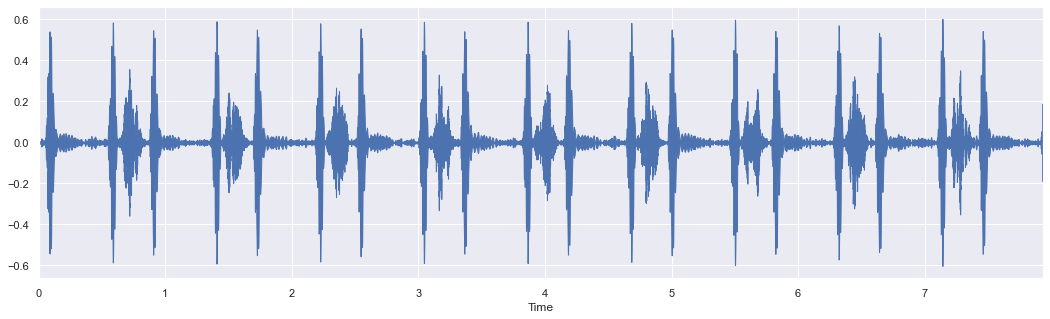

In [14]:

murmur_file=INPUT_DIR+"/set_a/murmur__201108222231.wav"
audio_murmur, sfreq_murmur = lr.load(murmur_file)
dur=lr.get_duration(audio_murmur)
time_murmur=np.arange(0, len(audio_murmur)) / sfreq_murmur
print ("duration:", dur)
print(audio_murmur.shape,sfreq_murmur)

plt.figure(figsize=(18,5))
librosa.display.waveplot(audio_murmur, sr=sfreq_murmur)

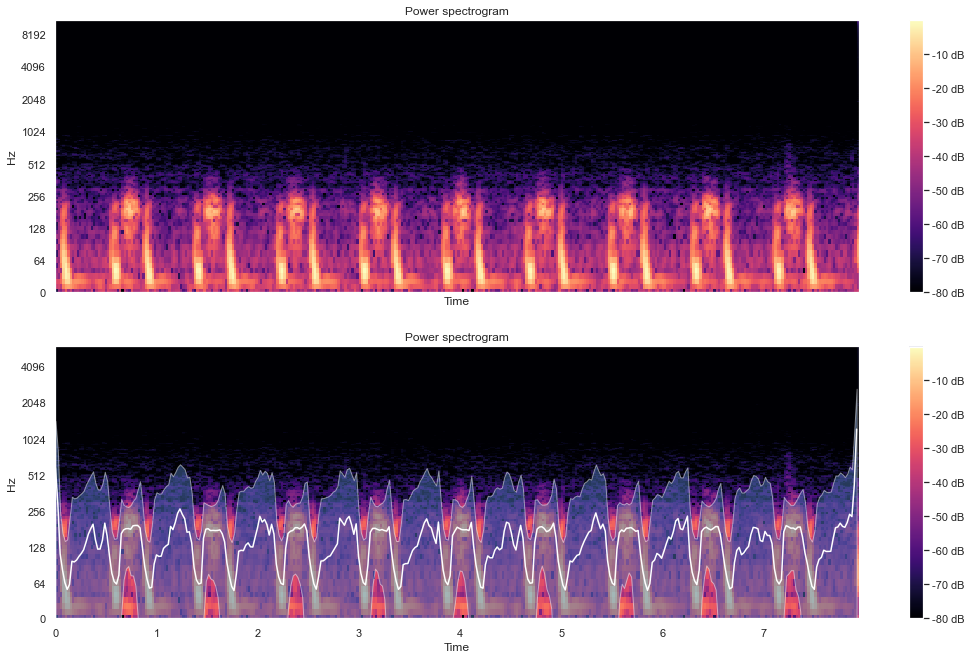

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(18,11), sharex=True)

audio_spec=np.abs(lr.stft(audio_murmur))
S_left=lr.stft(audio_murmur,center=False)
dtype_short=lr.stft(audio_murmur,hop_length=64)

# Calculate the spectral centroid, bandwidth and the times for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=audio_spec)[0]
centroids = lr.feature.spectral_centroid(S=audio_spec)[0]
times = lr.times_like(audio_spec)


########### UPPER PLOT #############
img = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[1])
axs[1].set_title('Power spectrogram')
fig.colorbar(img, ax=axs[1], format="%+2.0f dB")


axs[1].plot(times, centroids, color='w')
axs[1].fill_between(times, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
axs[1].set(ylim=[None, 6000])

################## without the reference as np.max  ######################
img2 = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[0])
axs[0].set_title('Power spectrogram')
fig.colorbar(img2, ax=axs[0], format="%+2.0f dB")

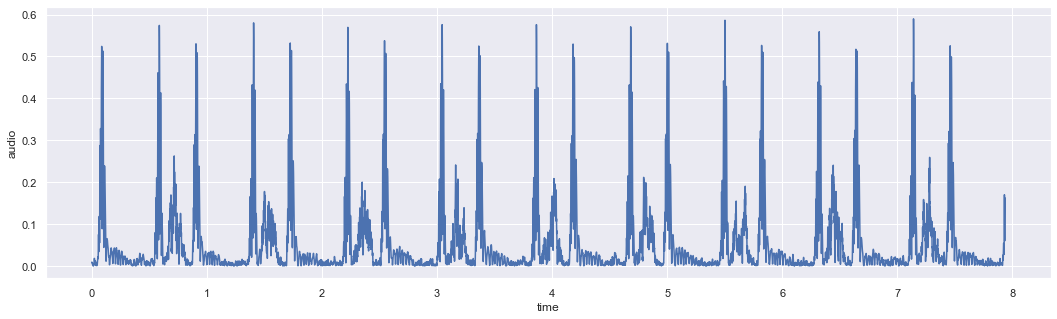

In [16]:
nfile=pd.DataFrame(data={'time':time_murmur,'audio':audio_murmur})
audio_rectified = nfile.apply(np.abs)

sns.set(rc={'figure.figsize':(18,5)})
audio_rectified_smooth = audio_rectified.rolling(50).mean()
sns.lineplot(data=audio_rectified_smooth,x='time',y='audio')
plt.show()

## Extrasystole
Extrasystole sounds may appear occasionally and can be identified because there is a heart sound that is out of rhythm involving extra or skipped heartbeats, e.g. a “lub-lub dub” or a “lub dub-dub”. (This is not the same as an extra heart sound as the event is not regularly occuring.) An extrasystole may not be a sign of disease. It can happen normally in an adult and can be very common in children. However, in some situations extrasystoles can be caused by heart diseases. If these diseases are detected earlier, then treatment is likely to be more effective. (source: Rita Getz)

duration: 4.676009070294785
(103106,) 22050


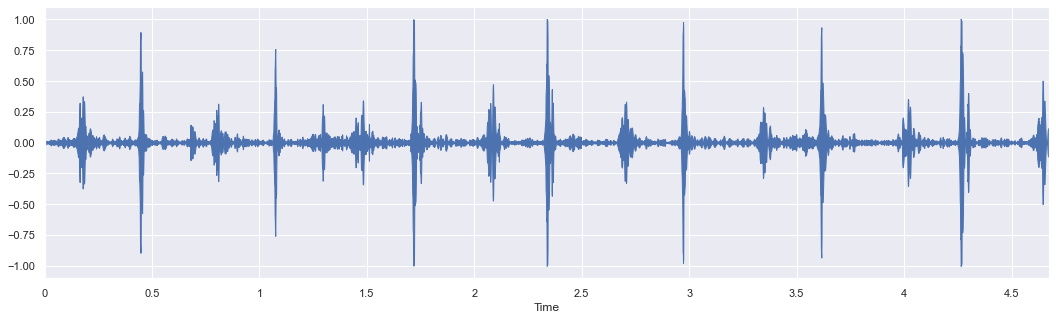

In [17]:
extrasystole_file=INPUT_DIR+"/set_b/extrastole__127_1306764300147_C2.wav"
audio_es,sfreq_es = lr.load(extrasystole_file)
dur=lr.get_duration(audio_es)
time_es=np.arange(0, len(audio_es)) / sfreq_es
print ("duration:", dur)
print(audio_es.shape,sfreq_es)

plt.figure(figsize=(18,5))
librosa.display.waveplot(audio_es, sr=sfreq_es)

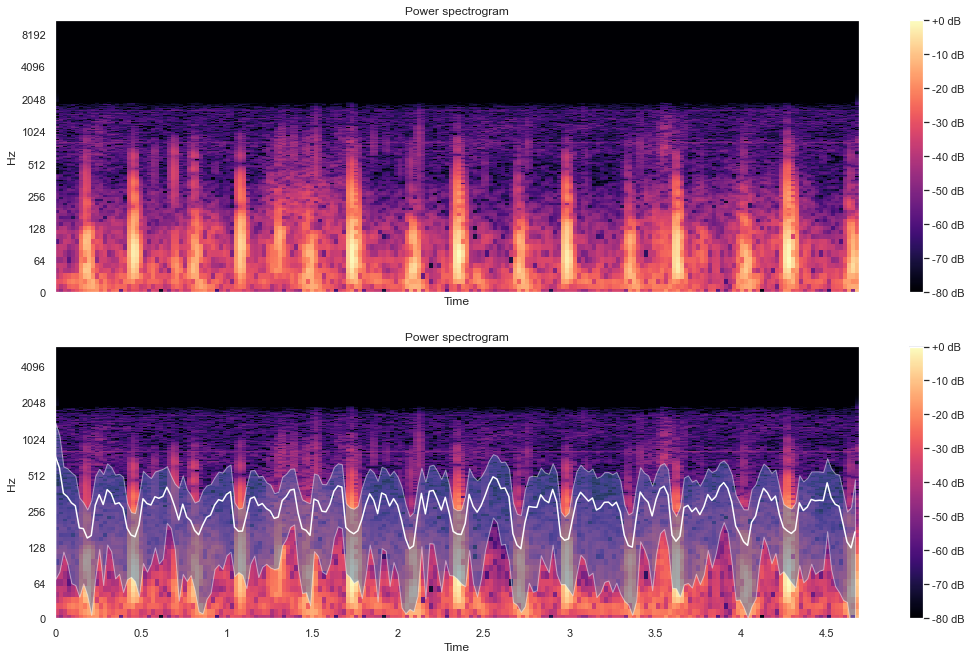

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(18,11), sharex=True)

audio_spec=np.abs(lr.stft(audio_es))
S_left=lr.stft(audio_es,center=False)
dtype_short=lr.stft(audio_es,hop_length=64)

# Calculate the spectral centroid, bandwidth and the times for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=audio_spec)[0]
centroids = lr.feature.spectral_centroid(S=audio_spec)[0]
times = lr.times_like(audio_spec)


########### UPPER PLOT #############
img = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[1])
axs[1].set_title('Power spectrogram')
fig.colorbar(img, ax=axs[1], format="%+2.0f dB")


axs[1].plot(times, centroids, color='w')
axs[1].fill_between(times, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
axs[1].set(ylim=[None, 6000])

################## without the reference as np.max  ######################
img2 = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[0])
axs[0].set_title('Power spectrogram')
fig.colorbar(img2, ax=axs[0], format="%+2.0f dB")

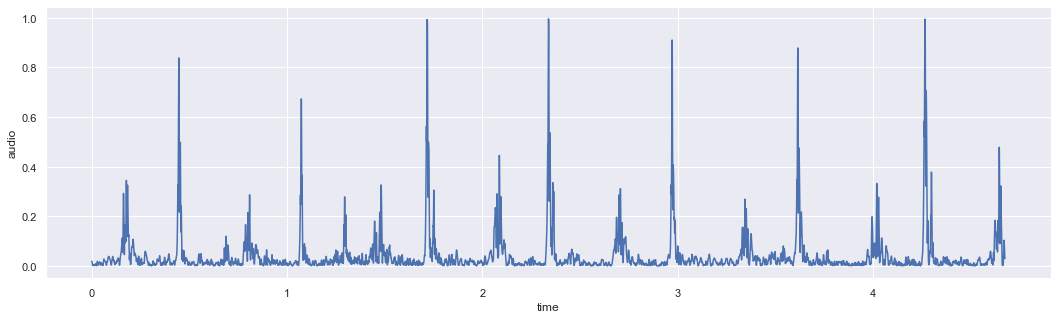

In [18]:
nfile=pd.DataFrame(data={'time':time_es,'audio':audio_es})
audio_rectified = nfile.apply(np.abs)

sns.set(rc={'figure.figsize':(18,5)})
audio_rectified_smooth = audio_rectified.rolling(50).mean()
sns.lineplot(data=audio_rectified_smooth,x='time',y='audio')
plt.show()

## Artifact
In the Artifact category there are a wide range of different sounds, including feedback squeals and echoes, speech, music and noise. There are usually no discernable heart sounds, and thus little or no temporal periodicity at frequencies below 195 Hz. This category is the most different from the others. It is important to be able to distinguish this category from the other three categories, so that someone gathering the data can be instructed to try again.(source: Rita Getz)

Duration: 9.0
(198450,) 22050


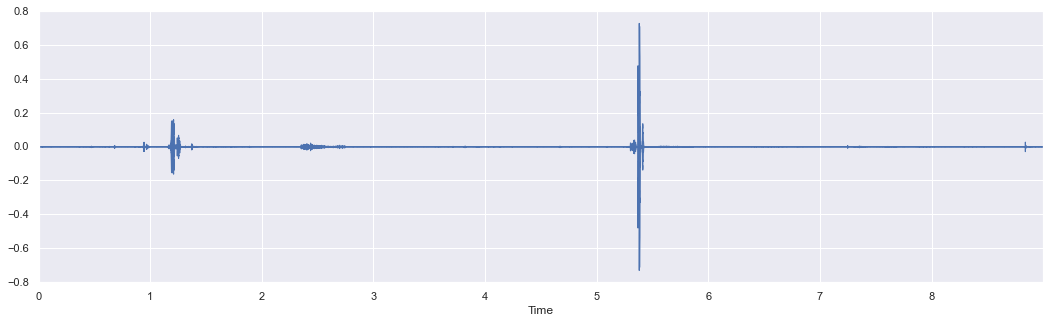

In [19]:
artifact_file=INPUT_DIR+"/set_a/artifact__201012172012.wav"
audio_artifact,sfreq_artifact=lr.load(artifact_file)
dur=lr.get_duration(audio_artifact)
time_artifact=np.arange(0, len(audio_artifact)) / sfreq_artifact
print("Duration:",dur)
print(audio_artifact.shape,sfreq_artifact)

plt.figure(figsize=(18,5))
librosa.display.waveplot(audio_artifact,sr=sfreq_artifact)


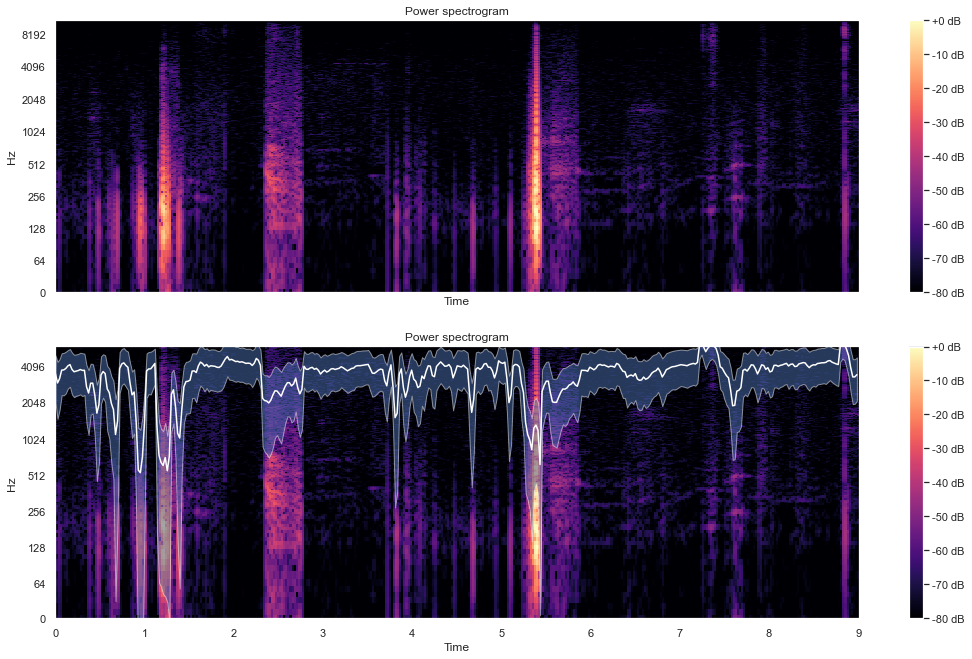

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(18,11), sharex=True)

audio_spec=np.abs(lr.stft(audio_artifact))
S_left=lr.stft(audio_artifact,center=False)
dtype_short=lr.stft(audio_artifact,hop_length=64)

# Calculate the spectral centroid, bandwidth and the times for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=audio_spec)[0]
centroids = lr.feature.spectral_centroid(S=audio_spec)[0]
times = lr.times_like(audio_spec)


########### UPPER PLOT #############
img = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[1])
axs[1].set_title('Power spectrogram')
fig.colorbar(img, ax=axs[1], format="%+2.0f dB")


axs[1].plot(times, centroids, color='w')
axs[1].fill_between(times, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
axs[1].set(ylim=[None, 6000])

################## without the reference as np.max  ######################
img2 = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[0])
axs[0].set_title('Power spectrogram')
fig.colorbar(img2, ax=axs[0], format="%+2.0f dB")

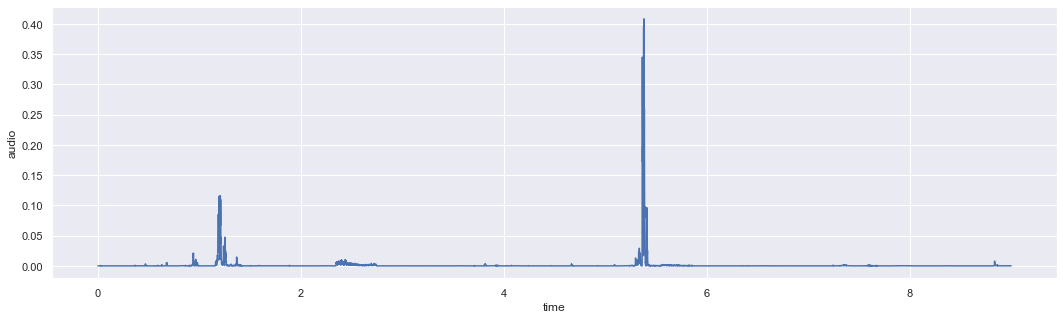

In [20]:
nfile=pd.DataFrame(data={'time':time_artifact,'audio':audio_artifact})
audio_rectified = nfile.apply(np.abs)

sns.set(rc={'figure.figsize':(18,5)})
audio_rectified_smooth = audio_rectified.rolling(50).mean()
sns.lineplot(data=audio_rectified_smooth,x='time',y='audio')
plt.show()

## Extra Heart Sound
In the Artifact category there are a wide range of different sounds, including feedback squeals and echoes, speech, music and noise. There are usually no discernable heart sounds, and thus little or no temporal periodicity at frequencies below 195 Hz. This category is the most different from the others. It is important to be able to distinguish this category from the other three categories, so that someone gathering the data can be instructed to try again.(source: Rita Getz)

duration: 8.88408163265306
(195894,) 22050


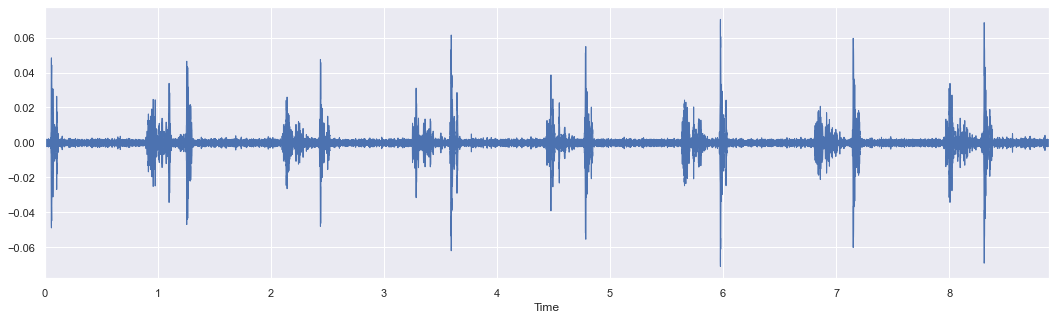

In [21]:
extrahls_file=INPUT_DIR+"/set_a/extrahls__201101070953.wav"
audio_ehs,sfreq_ehs = librosa.load(extrahls_file)
dur=librosa.get_duration(audio_ehs)
time_ehs=np.arange(0, len(audio_ehs)) / sfreq_ehs
print ("duration:", dur)
print(audio_ehs.shape,sfreq_ehs)

plt.figure(figsize=(18,5))
librosa.display.waveplot(audio_ehs,sr=sfreq_ehs)


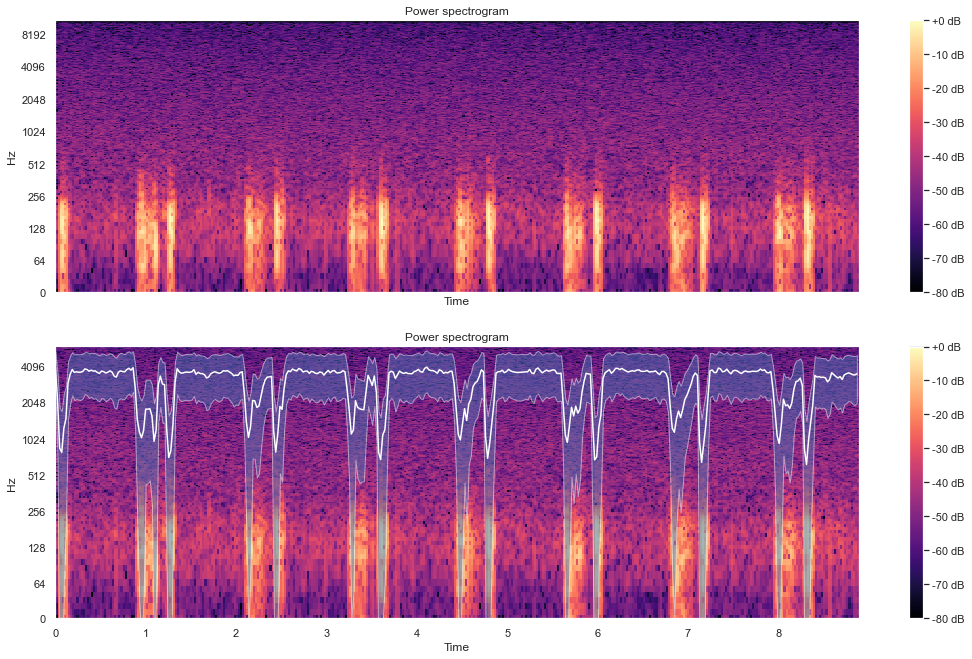

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(18,11), sharex=True)

audio_spec=np.abs(lr.stft(audio_ehs))
S_left=lr.stft(audio_ehs,center=False)
dtype_short=lr.stft(audio_ehs,hop_length=64)

# Calculate the spectral centroid, bandwidth and the times for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=audio_spec)[0]
centroids = lr.feature.spectral_centroid(S=audio_spec)[0]
times = lr.times_like(audio_spec)


########### UPPER PLOT #############
img = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[1])
axs[1].set_title('Power spectrogram')
fig.colorbar(img, ax=axs[1], format="%+2.0f dB")


axs[1].plot(times, centroids, color='w')
axs[1].fill_between(times, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
axs[1].set(ylim=[None, 6000])

################## without the reference as np.max  ######################
img2 = librosa.display.specshow(librosa.amplitude_to_db(audio_spec,ref=np.max),y_axis='log', x_axis='time', ax=axs[0])
axs[0].set_title('Power spectrogram')
fig.colorbar(img2, ax=axs[0], format="%+2.0f dB")

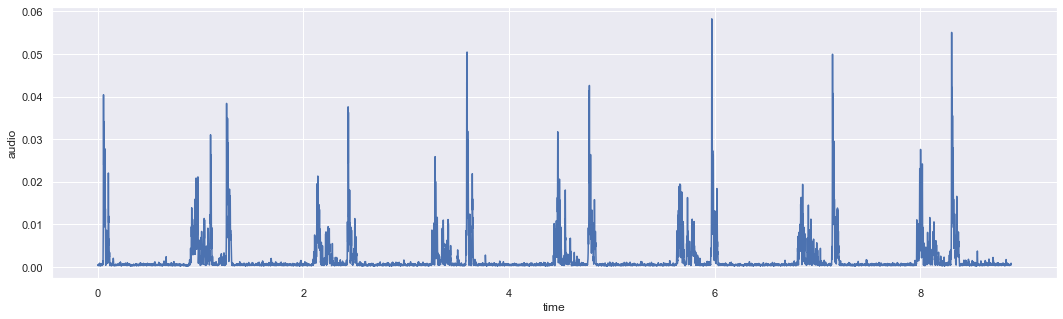

In [22]:
nfile=pd.DataFrame(data={'time':time_ehs,'audio':audio_ehs})
audio_rectified = nfile.apply(np.abs)

sns.set(rc={'figure.figsize':(18,5)})
audio_rectified_smooth = audio_rectified.rolling(50).mean()
sns.lineplot(data=audio_rectified_smooth,x='time',y='audio')
plt.show()

# Buscar graficos avanzados en librosa
# buscar en internet formas avanzadas de visualizar audios (frequencia, hertz) 
# buscar en que se descompone un audio e intentar visualizar todo

# Acuerdate de como se hace para clasificarlo segun este ejercicio:

* https://campus.datacamp.com/courses/machine-learning-for-time-series-data-in-python/time-series-as-inputs-to-a-model?ex=7
* https://campus.datacamp.com/courses/machine-learning-for-time-series-data-in-python/time-series-as-inputs-to-a-model?ex=12